# Importing network with all words

In [9]:
# Load augmented_network from creating_new_network.ipynb
# (Make sure you've run that notebook first and saved the pickle file)

import pickle
with open('augmented_network.pkl', 'rb') as f:
    augmented_network = pickle.load(f)

# Verify it loaded correctly
print(f"Loaded augmented_network:")
print(f"  Nodes: {len(augmented_network['nodes'])}")
print(f"  Edges: {augmented_network['graph'].number_of_edges():,}")
print(f"  Distance matrix shape: {augmented_network['distance_matrix'].shape}")


Loaded augmented_network:
  Nodes: 526
  Edges: 56,917
  Distance matrix shape: (526, 526)


In [11]:
# Train Skip-Gram Embeddings
# ============================================================================

from lab6 import train_embeddings

# Hyperparameters - adjust these for experiments
EMBEDDING_DIM = 64       # Try: 64, 128, 256
NUM_NEGATIVES = 20       # Try: 5, 10, 15, 20
CONTEXT_SIZE = 3         # Try: 1, 2, 3
BATCH_SIZE = 32          # Try: 64, 128, 256, 512
LEARNING_RATE = 0.001    # Try: 0.0001, 0.001, 0.01
EPOCHS = 50              # Max epochs (early stopping will kick in)
PATIENCE = 5             # Early stopping patience

# Train the model
results = train_embeddings(
    network_data=augmented_network,
    embedding_dim=EMBEDDING_DIM,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    num_negative=NUM_NEGATIVES,
    context_size=CONTEXT_SIZE,
    dropout=0.3,
    weight_decay=1e-4,
    label_smoothing=0.1,
    patience=PATIENCE,
    save_plot=True
)

# Print summary
print("\n" + "="*60)
print("TRAINING COMPLETE")
print("="*60)
print(f"Final train loss: {results['train_losses'][-1]:.4f}")
print(f"Final val loss: {results['val_losses'][-1]:.4f}")
print(f"Vocabulary size: {len(results['nodes']):,}")
print(f"Embedding shape: {results['embeddings'].shape}")
print(f"\nModel saved to: EMB{EMBEDDING_DIM}_NG{NUM_NEGATIVES}_CS{CONTEXT_SIZE}_BS{BATCH_SIZE}.pth")



🔧 PUNCTUATION FILTER:
  Removed: {'<RARE>', ',', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 20
  Total samples per epoch: 5,733,126
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 237,724
  Negatives per positive: 20
  Total samples per epoch: 4,992,204
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.070140
    Mean: 1.000000
    Median: 0.070140
    Max: 16.472691

Training on mps
Vocab: 523, Embed dim: 64, Context: 3, Negatives: 20
Regularization: dropout=0.3, weight_decay=0.0001, label_smoothing=0.1


Epoch 01  train=8.4296  val=5.9478  lr=0.001000
  → Best model (val_loss=5.9478), saved to EMB64NG20_CS3_BS32.pth


Epoch 02  train=8.1978  val=5.7623  lr=0.001000
  → Best model (val_loss=5.7623), saved to EMB64NG20_CS3_BS32.pth


Epoch 03  train=8.1751  val=5.6851  lr=0.001000
  → Best model (val_loss=5.6851), saved to EMB64NG20_CS3_BS32.pth


Epoch 04  train=8.1696  val=5.6903  lr=0.001000


Epoch 05  train=8.1670  val=5.6169  lr=0.001000
  → Best model (val_loss=5.6169), saved to EMB64NG20_CS3_BS32.pth


Epoch 06  train=8.1643  val=5.6517  lr=0.001000


Epoch 07  train=8.1649  val=5.6186  lr=0.001000


Epoch 08  train=8.1643  val=5.5827  lr=0.001000
  → Best model (val_loss=5.5827), saved to EMB64NG20_CS3_BS32.pth


Epoch 09  train=8.1642  val=5.5924  lr=0.001000


Epoch 10  train=8.1611  val=5.5659  lr=0.001000
  → Best model (val_loss=5.5659), saved to EMB64NG20_CS3_BS32.pth


Epoch 11  train=8.1627  val=5.6099  lr=0.001000


Epoch 12  train=8.1621  val=5.6269  lr=0.001000


Epoch 13  train=8.1614  val=5.6031  lr=0.001000


Epoch 14  train=8.1548  val=5.5737  lr=0.000500


Epoch 15  train=8.1526  val=5.5857  lr=0.000500

Early stopping at epoch 15

Saved loss plot to training_loss.png

TRAINING COMPLETE
Final train loss: 8.1526
Final val loss: 5.5857
Vocabulary size: 523
Embedding shape: (523, 64)

Model saved to: EMB64_NG20_CS3_BS32.pth


# **MODEL TESTING**

# RESUME ON TRYING TO IMPROVE ANALOGIES, BUT DONT SPEND TOO MUCH TIME ON IT

Loading best model from EMB64_NG20_CS3_BS32.pth...
✅ Loaded embeddings for 523 words
   Embedding dimension: 64

📊 CIFAR-100 Coverage: 100/100 words in model

EMBEDDING ANALYSIS

EMBEDDING ANALYSIS

Vocabulary: 523  Embedding dim: 64

Similarity stats (100 word sample):
  Mean: 0.5501  Std: 0.1437
  Min: 0.1475  Max: 0.9458

NEAREST NEIGHBORS

Most similar to 'bear':
  mouse            similarity=0.7298
  bridge           similarity=0.7294
  elephant         similarity=0.7153
  giraffe          similarity=0.7146
  ball             similarity=0.7007
  person's         similarity=0.6952
  clouds           similarity=0.6880
  broccoli         similarity=0.6825

Most similar to 'elephant':
  flag             similarity=0.7314
  clouds           similarity=0.7158
  bear             similarity=0.7153
  bottle           similarity=0.7052
  hill             similarity=0.6865
  giraffe          similarity=0.6646
  mouse            similarity=0.6527
  container        similarity=0.6461

Most sim

/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:782: RuntimeWarning: divide by zero encountered in matmul
  sample_emb = embeddings[:min(100, len(embeddings))]
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:782: RuntimeWarning: overflow encountered in matmul
  sample_emb = embeddings[:min(100, len(embeddings))]
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:782: RuntimeWarning: invalid value encountered in matmul
  sample_emb = embeddings[:min(100, len(embeddings))]
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/voodoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/voodoo/Library/Python/3

Saved t-SNE to embeddings_tsne.png

📈 Displaying t-SNE visualization:


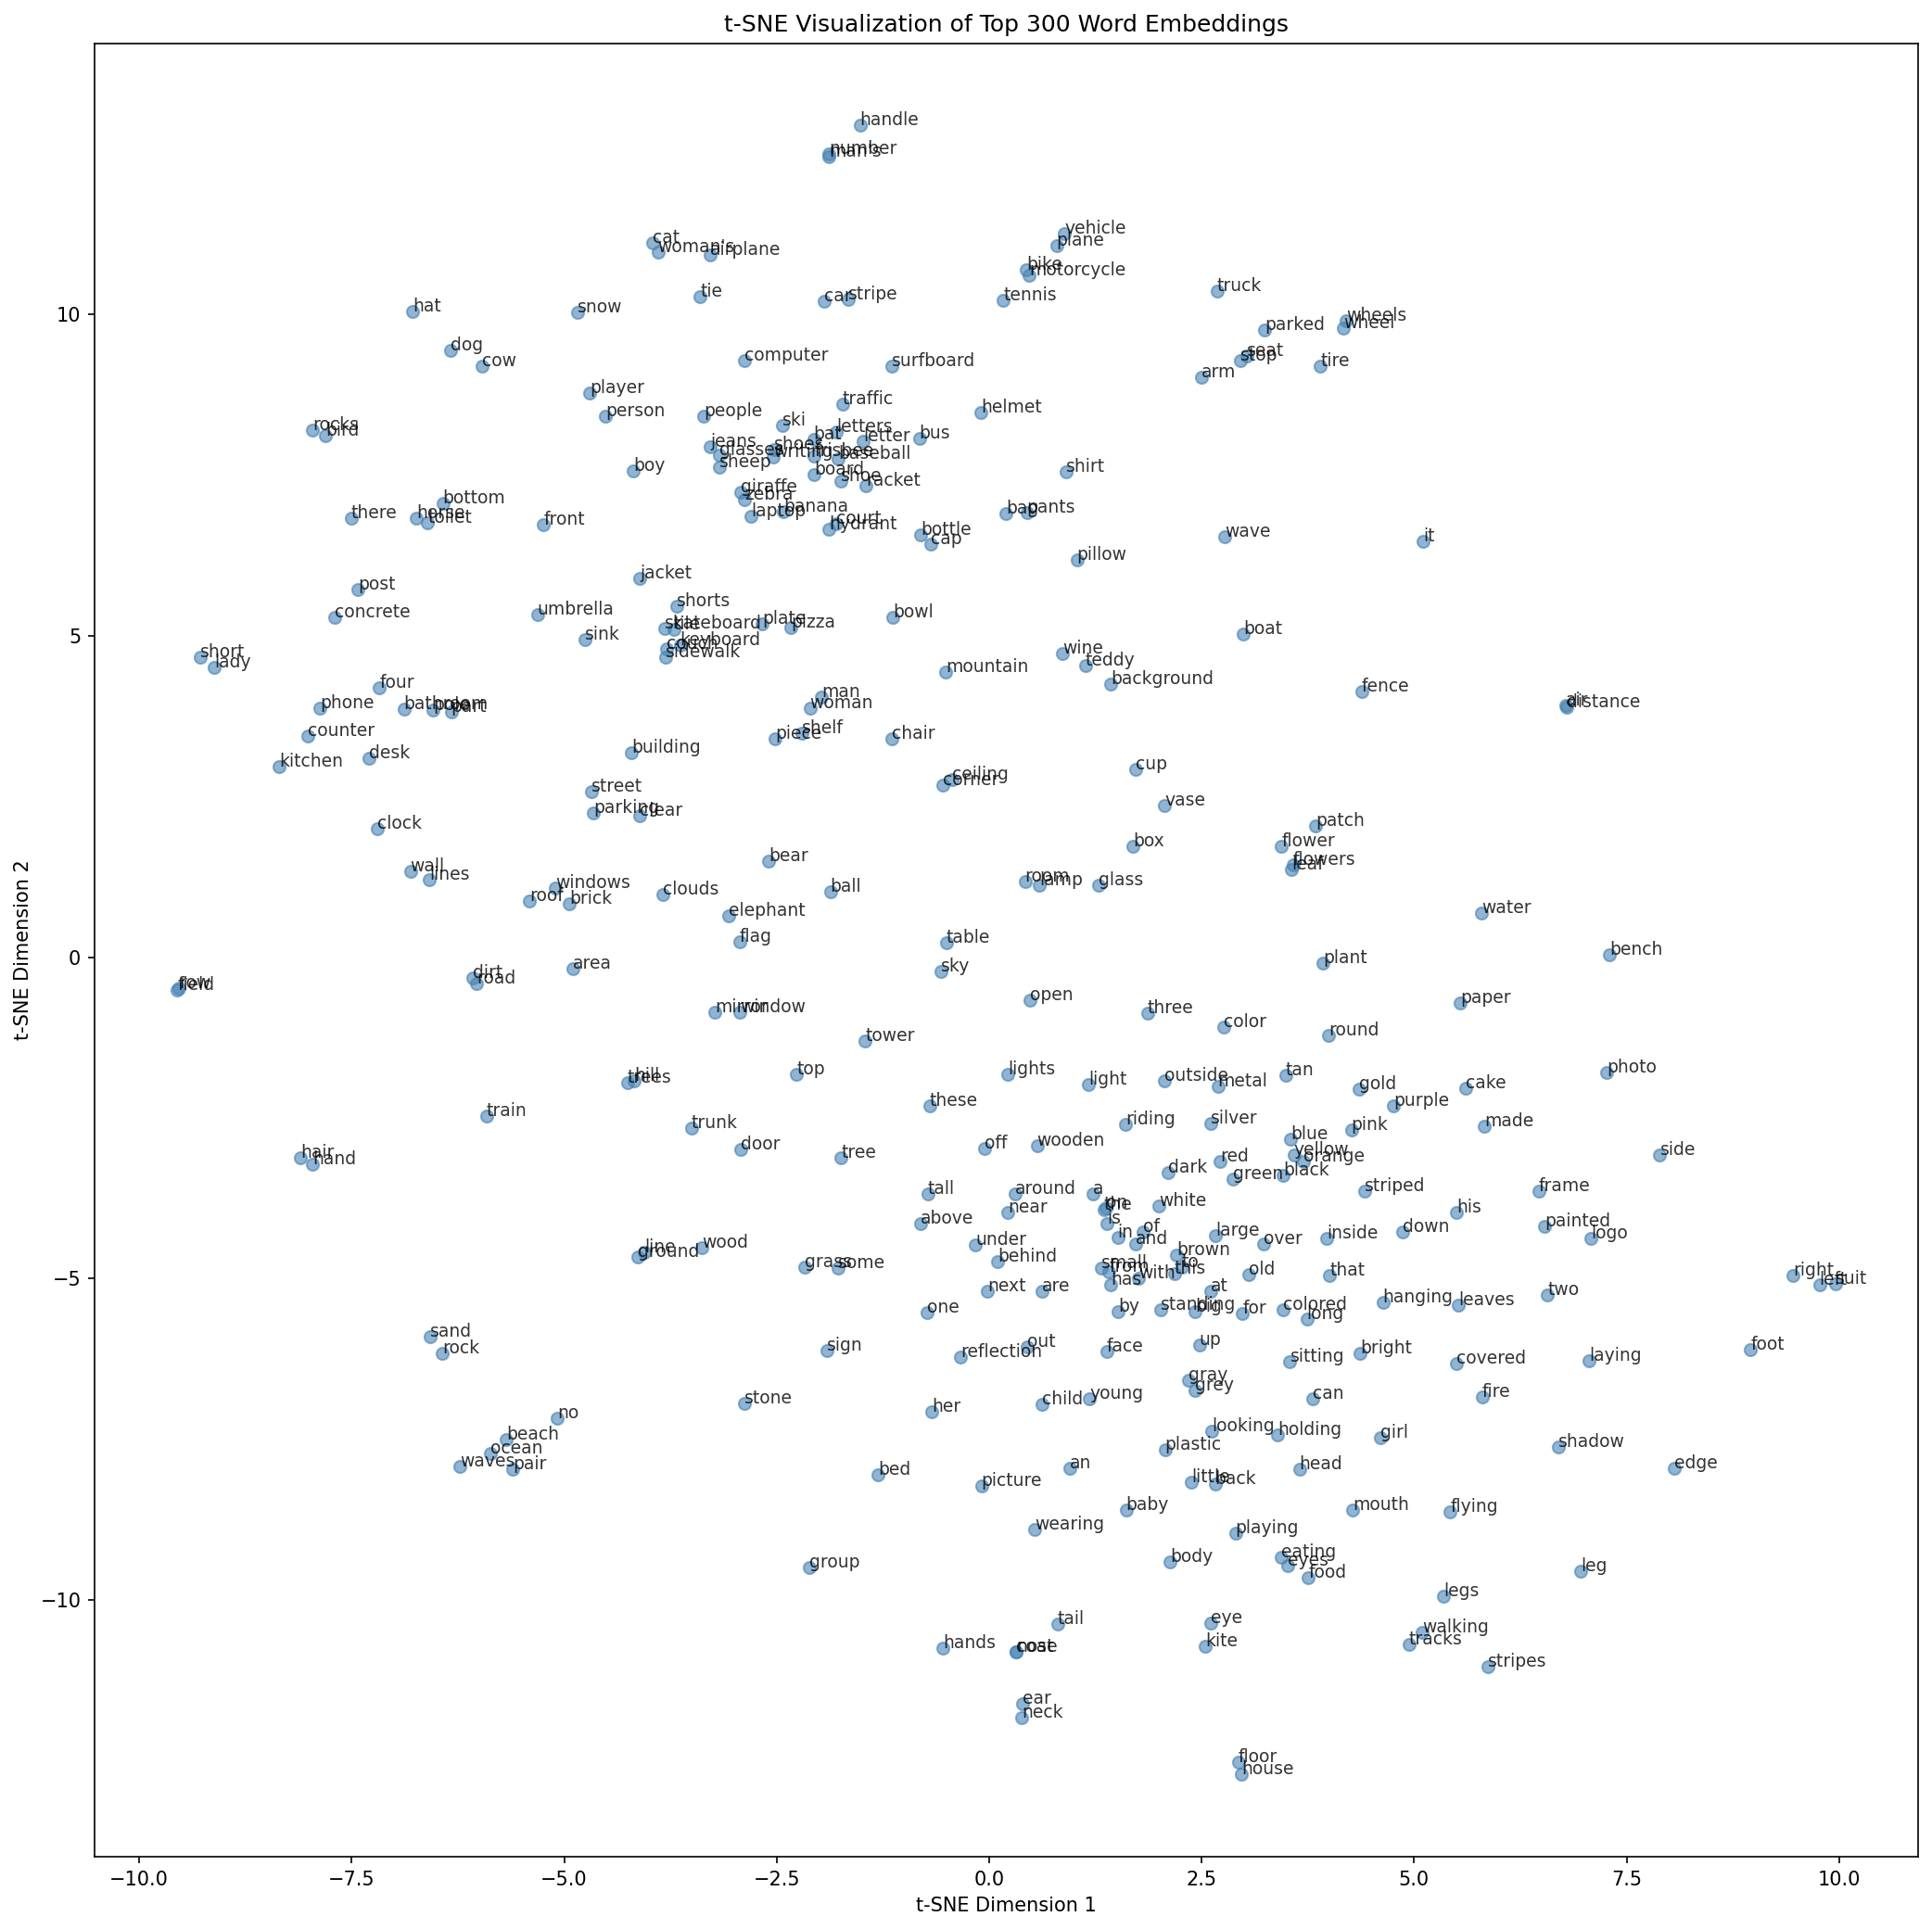

test_contexts_built (lab6.TestSkipGramDataset)
Test that contexts are built correctly. ... ok
test_getitem_returns_triplet (lab6.TestSkipGramDataset)
Test that __getitem__ returns correct format. ... ok
test_pairs_generated (lab6.TestSkipGramDataset)
Test that pairs are generated. ... ok
test_embeddings_initialized (lab6.TestSkipGramModel)
Test that embeddings are initialized. ... ok
test_forward_returns_loss (lab6.TestSkipGramModel)
Test that forward pass returns loss. ... ok
test_get_embeddings_returns_numpy (lab6.TestSkipGramModel)
Test that get_embeddings returns numpy array. ... ok
test_dataset_model_compatibility (lab6.TestIntegration)
Test that dataset output works with model input. ... 


🧪 UNIT TESTS
RUNNING SKIP-GRAM UNIT TESTS

✅ ALL TESTS PASSED!
Total tests run: 7
✅ All tests passed!

💾 SAVING METRICS
✅ Metrics saved to: Model Test Metrics/EMB64_NG20_CS3_BS32.txt


ok

----------------------------------------------------------------------
Ran 7 tests in 0.004s

OK
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_32140/2907656103.py:134: RuntimeWarning: divide by zero encountered in matmul
  sim_matrix = normalized @ normalized.T
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_32140/2907656103.py:134: RuntimeWarning: overflow encountered in matmul
  sim_matrix = normalized @ normalized.T
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_32140/2907656103.py:134: RuntimeWarning: invalid value encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:720: RuntimeWarning: divide by zero encountered in matmul
  idx = nodes.index(word)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:720: RuntimeWarning: overflow encountered in matmul
  idx = nodes.index(word)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:720: RuntimeWarning: invalid value encountered in matmul
  idx = n

In [12]:
# Load best_model.pth and analyze embeddings
# ============================================================================

from lab6 import analyze_embeddings, visualize_embeddings, SkipGramModel, run_tests, find_similar_words, solve_analogy
import torch
import os
import numpy as np
from IPython.display import Image, display
from datetime import datetime

# --- 0. Specify Model to Test ---
# UPDATE THIS to match your trained model filename
MODEL_EMB = 64
MODEL_NG = 20
MODEL_CS = 3
MODEL_BS = 32

model_path = f'EMB{MODEL_EMB}_NG{MODEL_NG}_CS{MODEL_CS}_BS{MODEL_BS}.pth'

# --- 1. Load Best Model ---
if os.path.exists(model_path):
    print(f"Loading best model from {model_path}...")
    checkpoint = torch.load(model_path)
    nodes = checkpoint['nodes']
    embedding_dim = checkpoint['embedding_dim']
    vocab_size = checkpoint['vocab_size']

    # Reconstruct model to get embeddings
    model = SkipGramModel(vocab_size, embedding_dim)
    model.load_state_dict(checkpoint['model_state_dict'])
    embeddings = model.get_embeddings()

    print(f"✅ Loaded embeddings for {len(nodes):,} words")
    print(f"   Embedding dimension: {embeddings.shape[1]}")
else:
    raise FileNotFoundError(f"{model_path} not found. Please train the model first.")

# --- 2. Check CIFAR-100 Coverage ---
import torchvision
cifar100 = torchvision.datasets.CIFAR100(root='./data', download=True)
cifar_words = set(cifar100.classes)
model_vocab = set(nodes)
cifar_in_model = cifar_words & model_vocab

print(f"\n📊 CIFAR-100 Coverage: {len(cifar_in_model)}/100 words in model")
if len(cifar_in_model) < 100:
    missing = sorted(cifar_words - model_vocab)
    print(f"   Missing: {missing[:10]}..." if len(missing) > 10 else f"   Missing: {missing}")

# --- 3. Qualitative Analysis ---
print("\n" + "="*80)
print("EMBEDDING ANALYSIS")
print("="*80)

# Test with CIFAR-100 words that should be in the model
cifar_test_words = [w for w in ['apple', 'bear', 'bicycle', 'bus', 'cat', 'dog', 
                                 'elephant', 'house', 'mountain', 'train', 'tiger',
                                 'lion', 'whale', 'butterfly', 'snake', 'turtle'] 
                    if w in model_vocab]

analyze_embeddings(
    nodes=nodes,
    embeddings=embeddings,

    # Nearest neighbors - mix of VG words and CIFAR-100 words
    similarity_examples=[
        # CIFAR-100 animals (if present)
        *[w for w in ['bear', 'elephant', 'tiger', 'lion', 'whale', 'butterfly', 
                      'snake', 'turtle', 'rabbit', 'fox', 'wolf'] if w in model_vocab][:6],
        # VG common words
        "man", "woman", "car", "tree", "building", "water",
        # Colors
        "red", "blue", "green", "white",
    ],

    # Analogies
    analogy_examples=[
        ("man", "woman", "boy"),           # → girl?
        ("red", "apple", "yellow"),        # → banana?
        ("dog", "cat", "horse"),           # → cow?
        ("car", "road", "boat"),           # → water?
    ],

    # Semantic clusters - include CIFAR words
    cluster_seeds=[
        *[w for w in ['bear', 'elephant', 'lion', 'tiger', 'cat', 'dog'] if w in model_vocab][:4],
        "car", "bus", "train", "bicycle",
        "red", "blue", "green", "yellow",
    ]
)

# --- 4. t-SNE Visualization ---
print("\n" + "="*80)
print("t-SNE VISUALIZATION")
print("="*80)

tsne_file = "embeddings_tsne.png"
visualize_embeddings(
    nodes,
    embeddings,
    output_file=tsne_file,
    sample_size=min(300, len(nodes)),
    annotate=True
)

if os.path.exists(tsne_file):
    print(f"\n📈 Displaying t-SNE visualization:")
    display(Image(filename=tsne_file, width=800))

# --- 5. Run Unit Tests ---
print("\n" + "="*80)
print("🧪 UNIT TESTS")
print("="*80)

success = run_tests()
if success:
    print("✅ All tests passed!")
else:
    print("❌ Some tests failed.")

# --- 6. Save Metrics to File ---
print("\n" + "="*80)
print("💾 SAVING METRICS")
print("="*80)

# Create directory if it doesn't exist
metrics_dir = "Model Test Metrics"
os.makedirs(metrics_dir, exist_ok=True)

# Compute similarity stats for saving
sample_emb = embeddings[:min(100, len(embeddings))]
norms = np.linalg.norm(sample_emb, axis=1, keepdims=True)
normalized = sample_emb / (norms + 1e-10)
sim_matrix = normalized @ normalized.T
sim_values = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]

# Get nearest neighbors for key words
similarity_test_words = [
    *[w for w in ['bear', 'elephant', 'tiger', 'lion', 'whale', 'butterfly', 
                  'snake', 'turtle', 'rabbit', 'fox', 'wolf'] if w in set(nodes)][:6],
    "man", "woman", "car", "tree", "building", "water",
]

# Get analogy results
analogy_tests = [
    ("man", "woman", "boy"),
    ("red", "apple", "yellow"),
    ("dog", "cat", "horse"),
    ("car", "road", "boat"),
]

# Build metrics file content
metrics_filename = f"EMB{MODEL_EMB}_NG{MODEL_NG}_CS{MODEL_CS}_BS{MODEL_BS}.txt"
metrics_path = os.path.join(metrics_dir, metrics_filename)

with open(metrics_path, 'w') as f:
    f.write("="*60 + "\n")
    f.write("MODEL TEST METRICS\n")
    f.write("="*60 + "\n\n")
    
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Model file: {model_path}\n\n")
    
    f.write("--- HYPERPARAMETERS ---\n")
    f.write(f"Embedding Dim:    {MODEL_EMB}\n")
    f.write(f"Num Negatives:    {MODEL_NG}\n")
    f.write(f"Context Size:     {MODEL_CS}\n")
    f.write(f"Batch Size:       {MODEL_BS}\n\n")
    
    f.write("--- MODEL INFO ---\n")
    f.write(f"Vocabulary Size:  {vocab_size}\n")
    f.write(f"Embedding Shape:  {embeddings.shape}\n\n")
    
    f.write("--- CIFAR-100 COVERAGE ---\n")
    f.write(f"Words in model:   {len(cifar_in_model)}/100\n")
    if len(cifar_in_model) < 100:
        missing = sorted(cifar_words - model_vocab)
        f.write(f"Missing words:    {missing}\n")
    f.write("\n")
    
    f.write("--- SIMILARITY STATS (100 word sample) ---\n")
    f.write(f"Mean:             {sim_values.mean():.4f}\n")
    f.write(f"Std:              {sim_values.std():.4f}\n")
    f.write(f"Min:              {sim_values.min():.4f}\n")
    f.write(f"Max:              {sim_values.max():.4f}\n\n")
    
    f.write("--- NEAREST NEIGHBORS ---\n")
    for word in similarity_test_words:
        if word in nodes:
            similar = find_similar_words(word, nodes, embeddings, top_k=5)
            neighbors = ", ".join([f"{w}({s:.3f})" for w, s in similar])
            f.write(f"{word}: {neighbors}\n")
    f.write("\n")
    
    f.write("--- ANALOGY TESTS (a:b :: c:?) ---\n")
    for a, b, c in analogy_tests:
        results = solve_analogy(a, b, c, nodes, embeddings, top_k=3)
        if results:
            answers = ", ".join([f"{w}({s:.3f})" for w, s in results])
            f.write(f"{a}:{b} :: {c}:? → {answers}\n")
        else:
            f.write(f"{a}:{b} :: {c}:? → (words not in vocabulary)\n")
    f.write("\n")
    
    f.write("--- UNIT TESTS ---\n")
    f.write(f"Passed: {'Yes' if success else 'No'}\n")
    
    f.write("\n" + "="*60 + "\n")

print(f"✅ Metrics saved to: {metrics_path}")


In [13]:
# Checking for emedding health, and checking for high std


"""
The marking scheme specifically asks for 
"nearest-neighbor analysis or other semantic metric-based assessments"
- so the nearest neighbours table for CIFAR words is your highest-value evidence.
"""

'\nThe marking scheme specifically asks for \n"nearest-neighbor analysis or other semantic metric-based assessments"\n- so the nearest neighbours table for CIFAR words is your highest-value evidence.\n'

In [14]:
# ============================================================================
# TRAINING AND TESTING SUITE - 16 Model Experiments
# ============================================================================
# 
# This suite trains 16 models varying:
# - embedding_dim: [32, 64, 128, 256]
# - num_negatives: [5, 10, 15, 20]  
# - context_size: [1, 2, 3, 4]
# - batch_size: [32, 64, 128, 256]
#
# We test one parameter at a time while holding others at baseline values.
# ============================================================================

from lab6 import train_embeddings, analyze_embeddings, SkipGramModel, find_similar_words, solve_analogy
import torch
import os
import numpy as np
from datetime import datetime
import importlib
import lab6
importlib.reload(lab6)  # Reload to pick up any changes
from lab6 import train_embeddings, analyze_embeddings, SkipGramModel, find_similar_words, solve_analogy

# --- BASELINE HYPERPARAMETERS ---
BASELINE = {
    'embedding_dim': 64,
    'num_negative': 10,
    'context_size': 2,
    'batch_size': 64,
    'learning_rate': 0.001,
    'epochs': 50,
    'dropout': 0.3,
    'weight_decay': 1e-4,
    'label_smoothing': 0.1,
    'patience': 5,
}

# --- EXPERIMENT CONFIGURATIONS ---
# Each experiment varies one parameter from baseline
experiments = [
    # Vary embedding_dim (4 experiments)
    {'name': 'EMB32',  'embedding_dim': 32},
    {'name': 'EMB64',  'embedding_dim': 64},
    {'name': 'EMB128', 'embedding_dim': 128},
    {'name': 'EMB256', 'embedding_dim': 256},
    
    # Vary num_negatives (4 experiments)  
    {'name': 'NG5',  'num_negative': 5},
    {'name': 'NG10', 'num_negative': 10},
    {'name': 'NG15', 'num_negative': 15},
    {'name': 'NG20', 'num_negative': 20},
    
    # Vary context_size (4 experiments)
    {'name': 'CS1', 'context_size': 1},
    {'name': 'CS2', 'context_size': 2},
    {'name': 'CS3', 'context_size': 3},
    {'name': 'CS4', 'context_size': 4},
    
    # Vary batch_size (4 experiments)
    {'name': 'BS32',  'batch_size': 32},
    {'name': 'BS64',  'batch_size': 64},
    {'name': 'BS128', 'batch_size': 128},
    {'name': 'BS256', 'batch_size': 256},
]

print(f"📋 Configured {len(experiments)} experiments")
print("=" * 60)
import time
import torchvision

# Create results directory
results_dir = "Model Test Metrics"
os.makedirs(results_dir, exist_ok=True)

# Load CIFAR-100 for coverage check
cifar100 = torchvision.datasets.CIFAR100(root='./data', download=True)
cifar_words = set(cifar100.classes)

# Store all results for comparison
all_results = []

print(f"\n{'='*80}")
print(f"STARTING {len(experiments)} EXPERIMENTS")
print(f"{'='*80}\n")

for i, exp in enumerate(experiments):
    exp_start = time.time()
    
    # Build hyperparameters: baseline + experiment overrides
    params = {**BASELINE, **{k: v for k, v in exp.items() if k != 'name'}}
    
    print(f"\n{'#'*80}")
    print(f"# EXPERIMENT {i+1}/{len(experiments)}: {exp['name']}")
    print(f"{'#'*80}")
    print(f"Parameters: emb={params['embedding_dim']}, ng={params['num_negative']}, "
          f"cs={params['context_size']}, bs={params['batch_size']}")
    
    # Train the model
    try:
        results = train_embeddings(
            network_data=augmented_network,
            embedding_dim=params['embedding_dim'],
            batch_size=params['batch_size'],
            epochs=params['epochs'],
            learning_rate=params['learning_rate'],
            num_negative=params['num_negative'],
            context_size=params['context_size'],
            dropout=params['dropout'],
            weight_decay=params['weight_decay'],
            label_smoothing=params['label_smoothing'],
            patience=params['patience'],
            save_plot=True,  # Save plot for each model (saved to plots/ directory)
            use_superclass=False,  # Set to True for superclass experiment
        )
        
        # Extract trained model info
        nodes = results['nodes']
        embeddings = results['embeddings']
        train_losses = results['train_losses']
        val_losses = results['val_losses']
        
        # Compute similarity stats
        sample_emb = embeddings[:min(100, len(embeddings))]
        norms = np.linalg.norm(sample_emb, axis=1, keepdims=True)
        normalized = sample_emb / (norms + 1e-10)
        sim_matrix = normalized @ normalized.T
        sim_values = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        
        sim_mean = float(sim_values.mean())
        sim_std = float(sim_values.std())
        sim_min = float(sim_values.min())
        sim_max = float(sim_values.max())
        
        # CIFAR-100 coverage
        model_vocab = set(nodes)
        cifar_coverage = len(cifar_words & model_vocab)
        
        # Analogy tests
        analogy_tests = [
            ("man", "woman", "boy", "girl"),
            ("red", "apple", "yellow", "banana"),
            ("dog", "cat", "horse", "cow"),
            ("car", "road", "boat", "water"),
        ]
        
        analogy_scores = []
        for a, b, c, expected in analogy_tests:
            results_analogy = solve_analogy(a, b, c, nodes, embeddings, top_k=10)
            if results_analogy:
                # Check if expected answer is in top 10
                top_words = [w for w, s in results_analogy]
                if expected in top_words:
                    rank = top_words.index(expected) + 1
                    analogy_scores.append(1.0 / rank)  # Higher score for better rank
                else:
                    analogy_scores.append(0.0)
        
        analogy_accuracy = np.mean(analogy_scores) if analogy_scores else 0.0
        
        # Store results
        exp_result = {
            'name': exp['name'],
            'params': params,
            'final_train_loss': train_losses[-1],
            'final_val_loss': val_losses[-1],
            'best_val_loss': min(val_losses),
            'epochs_run': len(train_losses),
            'sim_mean': sim_mean,
            'sim_std': sim_std,
            'sim_min': sim_min,
            'sim_max': sim_max,
            'cifar_coverage': cifar_coverage,
            'analogy_accuracy': analogy_accuracy,
            'training_time': time.time() - exp_start,
        }
        all_results.append(exp_result)
        
        # Save individual metrics file
        metrics_filename = f"{exp['name']}_EMB{params['embedding_dim']}_NG{params['num_negative']}_CS{params['context_size']}_BS{params['batch_size']}.txt"
        metrics_path = os.path.join(results_dir, metrics_filename)
        
        with open(metrics_path, 'w') as f:
            f.write("="*60 + "\n")
            f.write(f"EXPERIMENT: {exp['name']}\n")
            f.write("="*60 + "\n\n")
            
            f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            
            f.write("--- HYPERPARAMETERS ---\n")
            f.write(f"Embedding Dim:    {params['embedding_dim']}\n")
            f.write(f"Num Negatives:    {params['num_negative']}\n")
            f.write(f"Context Size:     {params['context_size']}\n")
            f.write(f"Batch Size:       {params['batch_size']}\n")
            f.write(f"Learning Rate:    {params['learning_rate']}\n")
            f.write(f"Dropout:          {params['dropout']}\n")
            f.write(f"Weight Decay:     {params['weight_decay']}\n\n")
            
            f.write("--- TRAINING RESULTS ---\n")
            f.write(f"Best Val Loss:    {min(val_losses):.4f}\n")
            f.write(f"Final Train Loss: {train_losses[-1]:.4f}\n")
            f.write(f"Final Val Loss:   {val_losses[-1]:.4f}\n")
            f.write(f"Epochs Run:       {len(train_losses)}\n")
            f.write(f"Training Time:    {(time.time() - exp_start)/60:.2f} min\n\n")
            
            f.write("--- SIMILARITY STATS ---\n")
            f.write(f"Mean:             {sim_mean:.4f}\n")
            f.write(f"Std:              {sim_std:.4f}\n")
            f.write(f"Min:              {sim_min:.4f}\n")
            f.write(f"Max:              {sim_max:.4f}\n\n")
            
            f.write("--- CIFAR-100 COVERAGE ---\n")
            f.write(f"Coverage:         {cifar_coverage}/100\n\n")
            
            f.write("--- ANALOGY ACCURACY ---\n")
            f.write(f"Score:            {analogy_accuracy:.4f}\n\n")
            
            # Nearest neighbors for key words
            f.write("--- NEAREST NEIGHBORS ---\n")
            test_words = ['bear', 'apple', 'car', 'man', 'dog']
            for word in test_words:
                if word in nodes:
                    similar = find_similar_words(word, nodes, embeddings, top_k=5)
                    neighbors = ", ".join([f"{w}({s:.3f})" for w, s in similar])
                    f.write(f"{word}: {neighbors}\n")
            
            f.write("\n" + "="*60 + "\n")
        
        print(f"\n✅ Experiment complete: val_loss={min(val_losses):.4f}, "
              f"sim_mean={sim_mean:.4f}, time={exp_result['training_time']/60:.1f}min")
        print(f"   Saved to: {metrics_path}")
        
    except Exception as e:
        print(f"\n❌ Experiment failed: {e}")
        all_results.append({
            'name': exp['name'],
            'error': str(e),
        })

print(f"\n{'='*80}")
print(f"ALL {len(experiments)} EXPERIMENTS COMPLETE")
print(f"{'='*80}")


📋 Configured 16 experiments

STARTING 16 EXPERIMENTS


################################################################################
# EXPERIMENT 1/16: EMB32
################################################################################
Parameters: emb=32, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143


/Users/voodoo/Library/Python/3.9/lib/python/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 67,450
  Negatives per positive: 10
  Total samples per epoch: 741,950
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.095894
    Mean: 1.000000
    Median: 0.117446
    Max: 14.923473

Training on mps
Vocab: 523, Embed dim: 32, Context: 2, Negatives: 10
Regularization: dropout=0.3, weight_decay=0.0001, label_smoothing=0.1


Epoch 01  train=5.0257  val=4.3016  lr=0.001000
  → Best model (val_loss=4.3016), saved to EMB32NG10_CS2_BS64.pth


Epoch 02  train=4.7838  val=4.3026  lr=0.001000


Epoch 03  train=4.7620  val=4.2981  lr=0.001000
  → Best model (val_loss=4.2981), saved to EMB32NG10_CS2_BS64.pth


Epoch 04  train=4.7494  val=4.2954  lr=0.001000
  → Best model (val_loss=4.2954), saved to EMB32NG10_CS2_BS64.pth


Epoch 05  train=4.7415  val=4.3041  lr=0.001000


Epoch 06  train=4.7381  val=4.3099  lr=0.001000


Epoch 07  train=4.7339  val=4.2990  lr=0.001000


Epoch 08  train=4.7304  val=4.2980  lr=0.000500


/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_32140/1232242836.py:126: RuntimeWarning: divide by zero encountered in matmul
  sim_matrix = normalized @ normalized.T
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_32140/1232242836.py:126: RuntimeWarning: overflow encountered in matmul
  sim_matrix = normalized @ normalized.T
/var/folders/9m/37dg7j617sq6gzsrv3mv9hc40000gn/T/ipykernel_32140/1232242836.py:126: RuntimeWarning: invalid value encountered in matmul
  sim_matrix = normalized @ normalized.T
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:736: RuntimeWarning: divide by zero encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTorch & AI CW/lab6.py:736: RuntimeWarning: overflow encountered in matmul
  similarities = (embeddings @ target_vec) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(target_vec) + 1e-10)
/Users/voodoo/Documents/PyTor

Epoch 09  train=4.7292  val=4.2987  lr=0.000500

Early stopping at epoch 9

Saved loss plot to plots/loss_EMB32_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2954, sim_mean=0.6645, time=5.2min
   Saved to: Model Test Metrics/EMB32_EMB32_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 2/16: EMB64
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pair

Epoch 01  train=4.9393  val=4.2629  lr=0.001000
  → Best model (val_loss=4.2629), saved to EMB64NG10_CS2_BS64.pth


Epoch 02  train=4.7341  val=4.2672  lr=0.001000


Epoch 03  train=4.7010  val=4.2576  lr=0.001000
  → Best model (val_loss=4.2576), saved to EMB64NG10_CS2_BS64.pth


Epoch 04  train=4.6870  val=4.2476  lr=0.001000
  → Best model (val_loss=4.2476), saved to EMB64NG10_CS2_BS64.pth


Epoch 05  train=4.6790  val=4.2302  lr=0.001000
  → Best model (val_loss=4.2302), saved to EMB64NG10_CS2_BS64.pth


Epoch 06  train=4.6753  val=4.2319  lr=0.001000


Epoch 07  train=4.6739  val=4.2511  lr=0.001000


Epoch 08  train=4.6722  val=4.2382  lr=0.001000


Epoch 09  train=4.6682  val=4.2340  lr=0.000500


Epoch 10  train=4.6662  val=4.2524  lr=0.000500

Early stopping at epoch 10

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2302, sim_mean=0.5125, time=5.9min
   Saved to: Model Test Metrics/EMB64_EMB64_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 3/16: EMB128
################################################################################
Parameters: emb=128, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive p

Epoch 01  train=4.8729  val=4.2641  lr=0.001000
  → Best model (val_loss=4.2641), saved to EMB128NG10_CS2_BS64.pth


Epoch 02  train=4.6773  val=4.2699  lr=0.001000


Epoch 03  train=4.6443  val=4.2399  lr=0.001000
  → Best model (val_loss=4.2399), saved to EMB128NG10_CS2_BS64.pth


Epoch 04  train=4.6355  val=4.2380  lr=0.001000
  → Best model (val_loss=4.2380), saved to EMB128NG10_CS2_BS64.pth


Epoch 05  train=4.6314  val=4.2609  lr=0.001000


Epoch 06  train=4.6282  val=4.2499  lr=0.001000


Epoch 07  train=4.6264  val=4.2507  lr=0.001000


Epoch 08  train=4.6195  val=4.2130  lr=0.000500
  → Best model (val_loss=4.2130), saved to EMB128NG10_CS2_BS64.pth


Epoch 09  train=4.6149  val=4.2327  lr=0.000500


Epoch 10  train=4.6137  val=4.2384  lr=0.000500


Epoch 11  train=4.6130  val=4.2203  lr=0.000500


Epoch 12  train=4.6102  val=4.2350  lr=0.000250


Epoch 13  train=4.6088  val=4.2352  lr=0.000250

Early stopping at epoch 13

Saved loss plot to plots/loss_EMB128_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2130, sim_mean=0.4041, time=7.9min
   Saved to: Model Test Metrics/EMB128_EMB128_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 4/16: EMB256
################################################################################
Parameters: emb=256, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positiv

Epoch 01  train=4.8128  val=4.2676  lr=0.001000
  → Best model (val_loss=4.2676), saved to EMB256NG10_CS2_BS64.pth


Epoch 02  train=4.6282  val=4.2741  lr=0.001000


Epoch 03  train=4.6072  val=4.2456  lr=0.001000
  → Best model (val_loss=4.2456), saved to EMB256NG10_CS2_BS64.pth


Epoch 04  train=4.6025  val=4.2883  lr=0.001000


Epoch 05  train=4.6017  val=4.2535  lr=0.001000


Epoch 06  train=4.5990  val=4.2844  lr=0.001000


Epoch 07  train=4.5901  val=4.2574  lr=0.000500


Epoch 08  train=4.5867  val=4.2369  lr=0.000500
  → Best model (val_loss=4.2369), saved to EMB256NG10_CS2_BS64.pth


Epoch 09  train=4.5842  val=4.2630  lr=0.000500


Epoch 10  train=4.5833  val=4.2715  lr=0.000500


Epoch 11  train=4.5828  val=4.2554  lr=0.000500


Epoch 12  train=4.5790  val=4.2330  lr=0.000250
  → Best model (val_loss=4.2330), saved to EMB256NG10_CS2_BS64.pth


Epoch 13  train=4.5778  val=4.2311  lr=0.000250
  → Best model (val_loss=4.2311), saved to EMB256NG10_CS2_BS64.pth


Epoch 14  train=4.5758  val=4.2356  lr=0.000250


Epoch 15  train=4.5735  val=4.2349  lr=0.000250


Epoch 16  train=4.5740  val=4.2403  lr=0.000250


Epoch 17  train=4.5726  val=4.2317  lr=0.000125


Epoch 18  train=4.5712  val=4.2292  lr=0.000125
  → Best model (val_loss=4.2292), saved to EMB256NG10_CS2_BS64.pth


Epoch 19  train=4.5720  val=4.2326  lr=0.000125


Epoch 20  train=4.5713  val=4.2372  lr=0.000125


Epoch 21  train=4.5703  val=4.2380  lr=0.000125


Epoch 22  train=4.5709  val=4.2317  lr=0.000063


Epoch 23  train=4.5692  val=4.2394  lr=0.000063

Early stopping at epoch 23

Saved loss plot to plots/loss_EMB256_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2292, sim_mean=0.3177, time=14.9min
   Saved to: Model Test Metrics/EMB256_EMB256_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 5/16: NG5
################################################################################
Parameters: emb=64, ng=5, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 5
  Total samples per epoch: 1,638,036
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pai

Epoch 01  train=3.0087  val=3.3695  lr=0.001000
  → Best model (val_loss=3.3695), saved to EMB64NG5_CS2_BS64.pth


Epoch 02  train=2.8754  val=3.3633  lr=0.001000
  → Best model (val_loss=3.3633), saved to EMB64NG5_CS2_BS64.pth


Epoch 03  train=2.8401  val=3.3622  lr=0.001000
  → Best model (val_loss=3.3622), saved to EMB64NG5_CS2_BS64.pth


Epoch 04  train=2.8240  val=3.3626  lr=0.001000


Epoch 05  train=2.8176  val=3.3438  lr=0.001000
  → Best model (val_loss=3.3438), saved to EMB64NG5_CS2_BS64.pth


Epoch 06  train=2.8149  val=3.3404  lr=0.001000
  → Best model (val_loss=3.3404), saved to EMB64NG5_CS2_BS64.pth


Epoch 07  train=2.8122  val=3.3542  lr=0.001000


Epoch 08  train=2.8108  val=3.3570  lr=0.001000


Epoch 09  train=2.8098  val=3.3639  lr=0.001000


Epoch 10  train=2.8062  val=3.3571  lr=0.000500


Epoch 11  train=2.8018  val=3.3461  lr=0.000500

Early stopping at epoch 11

Saved loss plot to plots/loss_EMB64_NG5_CS2_BS64.png

✅ Experiment complete: val_loss=3.3404, sim_mean=0.4418, time=6.3min
   Saved to: Model Test Metrics/NG5_EMB64_NG5_CS2_BS64.txt

################################################################################
# EXPERIMENT 6/16: NG10
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 6

Epoch 01  train=4.9418  val=4.2846  lr=0.001000
  → Best model (val_loss=4.2846), saved to EMB64NG10_CS2_BS64.pth


Epoch 02  train=4.7335  val=4.2933  lr=0.001000


Epoch 03  train=4.7025  val=4.2676  lr=0.001000
  → Best model (val_loss=4.2676), saved to EMB64NG10_CS2_BS64.pth


Epoch 04  train=4.6870  val=4.2989  lr=0.001000


Epoch 05  train=4.6794  val=4.2835  lr=0.001000


Epoch 06  train=4.6769  val=4.2725  lr=0.001000


Epoch 07  train=4.6699  val=4.2897  lr=0.000500


Epoch 08  train=4.6677  val=4.2585  lr=0.000500
  → Best model (val_loss=4.2585), saved to EMB64NG10_CS2_BS64.pth


Epoch 09  train=4.6654  val=4.2712  lr=0.000500


Epoch 10  train=4.6654  val=4.2628  lr=0.000500


Epoch 11  train=4.6641  val=4.2747  lr=0.000500


Epoch 12  train=4.6615  val=4.2594  lr=0.000250


Epoch 13  train=4.6610  val=4.2733  lr=0.000250

Early stopping at epoch 13

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2585, sim_mean=0.5192, time=7.5min
   Saved to: Model Test Metrics/NG10_EMB64_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 7/16: NG15
################################################################################
Parameters: emb=64, ng=15, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 15
  Total samples per epoch: 4,368,096
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs

Epoch 01  train=6.7556  val=4.9693  lr=0.001000
  → Best model (val_loss=4.9693), saved to EMB64NG15_CS2_BS64.pth


Epoch 02  train=6.4971  val=4.9676  lr=0.001000
  → Best model (val_loss=4.9676), saved to EMB64NG15_CS2_BS64.pth


Epoch 03  train=6.4647  val=4.9801  lr=0.001000


Epoch 04  train=6.4499  val=4.9400  lr=0.001000
  → Best model (val_loss=4.9400), saved to EMB64NG15_CS2_BS64.pth


Epoch 05  train=6.4438  val=4.9522  lr=0.001000


Epoch 06  train=6.4397  val=4.9650  lr=0.001000


Epoch 07  train=6.4371  val=4.9410  lr=0.001000


Epoch 08  train=6.4323  val=4.9414  lr=0.000500


Epoch 09  train=6.4319  val=4.9459  lr=0.000500

Early stopping at epoch 9

Saved loss plot to plots/loss_EMB64_NG15_CS2_BS64.png

✅ Experiment complete: val_loss=4.9400, sim_mean=0.5568, time=5.2min
   Saved to: Model Test Metrics/NG15_EMB64_NG15_CS2_BS64.txt

################################################################################
# EXPERIMENT 8/16: NG20
################################################################################
Parameters: emb=64, ng=20, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 20
  Total samples per epoch: 5,733,126
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs:

Epoch 01  train=8.5238  val=5.6019  lr=0.001000
  → Best model (val_loss=5.6019), saved to EMB64NG20_CS2_BS64.pth


Epoch 02  train=8.2139  val=5.6198  lr=0.001000


Epoch 03  train=8.1836  val=5.6137  lr=0.001000


Epoch 04  train=8.1712  val=5.6058  lr=0.001000


Epoch 05  train=8.1596  val=5.5934  lr=0.000500
  → Best model (val_loss=5.5934), saved to EMB64NG20_CS2_BS64.pth


Epoch 06  train=8.1560  val=5.6087  lr=0.000500


Epoch 07  train=8.1556  val=5.6028  lr=0.000500


Epoch 08  train=8.1517  val=5.6090  lr=0.000500


Epoch 09  train=8.1484  val=5.6070  lr=0.000250


Epoch 10  train=8.1496  val=5.5993  lr=0.000250

Early stopping at epoch 10

Saved loss plot to plots/loss_EMB64_NG20_CS2_BS64.png

✅ Experiment complete: val_loss=5.5934, sim_mean=0.6060, time=5.7min
   Saved to: Model Test Metrics/NG20_EMB64_NG20_CS2_BS64.txt

################################################################################
# EXPERIMENT 9/16: CS1
################################################################################
Parameters: emb=64, ng=10, cs=1, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 105,292
  Negatives per positive: 10
  Total samples per epoch: 1,158,212
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.008094
    Mean: 1.000000
    Median: 0.021416
    Max: 7.973348

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 

Epoch 01  train=5.1148  val=4.3820  lr=0.001000
  → Best model (val_loss=4.3820), saved to EMB64NG10_CS1_BS64.pth


Epoch 02  train=4.5189  val=4.8399  lr=0.001000


Epoch 03  train=4.3391  val=5.3106  lr=0.001000


Epoch 04  train=4.2368  val=5.6698  lr=0.001000


Epoch 05  train=4.1846  val=5.7687  lr=0.000500


Epoch 06  train=4.1623  val=5.9160  lr=0.000500

Early stopping at epoch 6

Saved loss plot to plots/loss_EMB64_NG10_CS1_BS64.png

✅ Experiment complete: val_loss=4.3820, sim_mean=0.2779, time=1.0min
   Saved to: Model Test Metrics/CS1_EMB64_NG10_CS1_BS64.txt

################################################################################
# EXPERIMENT 10/16: CS2
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 

Epoch 01  train=4.9379  val=4.2995  lr=0.001000
  → Best model (val_loss=4.2995), saved to EMB64NG10_CS2_BS64.pth


Epoch 02  train=4.7349  val=4.3082  lr=0.001000


Epoch 03  train=4.7016  val=4.2929  lr=0.001000
  → Best model (val_loss=4.2929), saved to EMB64NG10_CS2_BS64.pth


Epoch 04  train=4.6871  val=4.2847  lr=0.001000
  → Best model (val_loss=4.2847), saved to EMB64NG10_CS2_BS64.pth


Epoch 05  train=4.6790  val=4.2856  lr=0.001000


Epoch 06  train=4.6758  val=4.2889  lr=0.001000


Epoch 07  train=4.6740  val=4.2953  lr=0.001000


Epoch 08  train=4.6697  val=4.2779  lr=0.000500
  → Best model (val_loss=4.2779), saved to EMB64NG10_CS2_BS64.pth


Epoch 09  train=4.6665  val=4.2830  lr=0.000500


Epoch 10  train=4.6659  val=4.2776  lr=0.000500
  → Best model (val_loss=4.2776), saved to EMB64NG10_CS2_BS64.pth


Epoch 11  train=4.6631  val=4.2663  lr=0.000500
  → Best model (val_loss=4.2663), saved to EMB64NG10_CS2_BS64.pth


Epoch 12  train=4.6630  val=4.2841  lr=0.000500


Epoch 13  train=4.6643  val=4.2695  lr=0.000500


Epoch 14  train=4.6640  val=4.2533  lr=0.000500
  → Best model (val_loss=4.2533), saved to EMB64NG10_CS2_BS64.pth


Epoch 15  train=4.6628  val=4.2687  lr=0.000500


Epoch 16  train=4.6627  val=4.2813  lr=0.000500


Epoch 17  train=4.6635  val=4.2843  lr=0.000500


Epoch 18  train=4.6605  val=4.2731  lr=0.000250


Epoch 19  train=4.6594  val=4.2776  lr=0.000250

Early stopping at epoch 19

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2533, sim_mean=0.5052, time=11.0min
   Saved to: Model Test Metrics/CS2_EMB64_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 11/16: CS3
################################################################################
Parameters: emb=64, ng=10, cs=3, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs

Epoch 01  train=4.9416  val=4.6539  lr=0.001000
  → Best model (val_loss=4.6539), saved to EMB64NG10_CS3_BS64.pth


Epoch 02  train=4.7338  val=4.5534  lr=0.001000
  → Best model (val_loss=4.5534), saved to EMB64NG10_CS3_BS64.pth


Epoch 03  train=4.7007  val=4.3951  lr=0.001000
  → Best model (val_loss=4.3951), saved to EMB64NG10_CS3_BS64.pth


Epoch 04  train=4.6868  val=4.3599  lr=0.001000
  → Best model (val_loss=4.3599), saved to EMB64NG10_CS3_BS64.pth


Epoch 05  train=4.6804  val=4.2930  lr=0.001000
  → Best model (val_loss=4.2930), saved to EMB64NG10_CS3_BS64.pth


Epoch 06  train=4.6762  val=4.3010  lr=0.001000


Epoch 07  train=4.6732  val=4.2920  lr=0.001000
  → Best model (val_loss=4.2920), saved to EMB64NG10_CS3_BS64.pth


Epoch 08  train=4.6726  val=4.2736  lr=0.001000
  → Best model (val_loss=4.2736), saved to EMB64NG10_CS3_BS64.pth


Epoch 09  train=4.6711  val=4.2600  lr=0.001000
  → Best model (val_loss=4.2600), saved to EMB64NG10_CS3_BS64.pth


Epoch 10  train=4.6699  val=4.2581  lr=0.001000
  → Best model (val_loss=4.2581), saved to EMB64NG10_CS3_BS64.pth


Epoch 11  train=4.6704  val=4.2745  lr=0.001000


Epoch 12  train=4.6696  val=4.2833  lr=0.001000


Epoch 13  train=4.6695  val=4.2525  lr=0.001000
  → Best model (val_loss=4.2525), saved to EMB64NG10_CS3_BS64.pth


Epoch 14  train=4.6683  val=4.2967  lr=0.001000


Epoch 15  train=4.6682  val=4.2618  lr=0.001000


Epoch 16  train=4.6691  val=4.3058  lr=0.001000


Epoch 17  train=4.6636  val=4.2756  lr=0.000500


Epoch 18  train=4.6625  val=4.2708  lr=0.000500

Early stopping at epoch 18

Saved loss plot to plots/loss_EMB64_NG10_CS3_BS64.png

✅ Experiment complete: val_loss=4.2525, sim_mean=0.4965, time=15.3min
   Saved to: Model Test Metrics/CS3_EMB64_NG10_CS3_BS64.txt

################################################################################
# EXPERIMENT 12/16: CS4
################################################################################
Parameters: emb=64, ng=10, cs=4, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs

Epoch 01  train=4.9430  val=5.0646  lr=0.001000
  → Best model (val_loss=5.0646), saved to EMB64NG10_CS4_BS64.pth


Epoch 02  train=4.7341  val=4.4141  lr=0.001000
  → Best model (val_loss=4.4141), saved to EMB64NG10_CS4_BS64.pth


Epoch 03  train=4.7012  val=4.4016  lr=0.001000
  → Best model (val_loss=4.4016), saved to EMB64NG10_CS4_BS64.pth


Epoch 04  train=4.6876  val=4.5127  lr=0.001000


Epoch 05  train=4.6788  val=4.2044  lr=0.001000
  → Best model (val_loss=4.2044), saved to EMB64NG10_CS4_BS64.pth


Epoch 06  train=4.6762  val=4.4077  lr=0.001000


Epoch 07  train=4.6733  val=4.2685  lr=0.001000


Epoch 08  train=4.6714  val=4.3661  lr=0.001000


Epoch 09  train=4.6674  val=4.2932  lr=0.000500


Epoch 10  train=4.6663  val=4.3024  lr=0.000500

Early stopping at epoch 10

Saved loss plot to plots/loss_EMB64_NG10_CS4_BS64.png

✅ Experiment complete: val_loss=4.2044, sim_mean=0.5156, time=9.2min
   Saved to: Model Test Metrics/CS4_EMB64_NG10_CS4_BS64.txt

################################################################################
# EXPERIMENT 13/16: BS32
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=32

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs

Epoch 01  train=4.8839  val=4.3042  lr=0.001000
  → Best model (val_loss=4.3042), saved to EMB64NG10_CS2_BS32.pth


Epoch 02  train=4.7155  val=4.3036  lr=0.001000
  → Best model (val_loss=4.3036), saved to EMB64NG10_CS2_BS32.pth


Epoch 03  train=4.6923  val=4.2675  lr=0.001000
  → Best model (val_loss=4.2675), saved to EMB64NG10_CS2_BS32.pth


Epoch 04  train=4.6847  val=4.3033  lr=0.001000


Epoch 05  train=4.6810  val=4.3024  lr=0.001000


Epoch 06  train=4.6795  val=4.2970  lr=0.001000


Epoch 07  train=4.6719  val=4.3053  lr=0.000500


Epoch 08  train=4.6682  val=4.2700  lr=0.000500

Early stopping at epoch 8

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS32.png

✅ Experiment complete: val_loss=4.2675, sim_mean=0.4960, time=6.7min
   Saved to: Model Test Metrics/BS32_EMB64_NG10_CS2_BS32.txt

################################################################################
# EXPERIMENT 14/16: BS64
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=64

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs

Epoch 01  train=4.9413  val=4.3097  lr=0.001000
  → Best model (val_loss=4.3097), saved to EMB64NG10_CS2_BS64.pth


Epoch 02  train=4.7342  val=4.2835  lr=0.001000
  → Best model (val_loss=4.2835), saved to EMB64NG10_CS2_BS64.pth


Epoch 03  train=4.7021  val=4.2499  lr=0.001000
  → Best model (val_loss=4.2499), saved to EMB64NG10_CS2_BS64.pth


Epoch 04  train=4.6869  val=4.2633  lr=0.001000


Epoch 05  train=4.6799  val=4.2727  lr=0.001000


Epoch 06  train=4.6769  val=4.2731  lr=0.001000


Epoch 07  train=4.6684  val=4.2791  lr=0.000500


Epoch 08  train=4.6675  val=4.2662  lr=0.000500

Early stopping at epoch 8

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS64.png

✅ Experiment complete: val_loss=4.2499, sim_mean=0.5237, time=4.7min
   Saved to: Model Test Metrics/BS64_EMB64_NG10_CS2_BS64.txt

################################################################################
# EXPERIMENT 15/16: BS128
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=128

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pai

Epoch 01  train=5.0236  val=4.3042  lr=0.001000
  → Best model (val_loss=4.3042), saved to EMB64NG10_CS2_BS128.pth


Epoch 02  train=4.7588  val=4.2960  lr=0.001000
  → Best model (val_loss=4.2960), saved to EMB64NG10_CS2_BS128.pth


Epoch 03  train=4.7255  val=4.2914  lr=0.001000
  → Best model (val_loss=4.2914), saved to EMB64NG10_CS2_BS128.pth


Epoch 04  train=4.7005  val=4.3170  lr=0.001000


Epoch 05  train=4.6873  val=4.3004  lr=0.001000


Epoch 06  train=4.6795  val=4.3085  lr=0.001000


Epoch 07  train=4.6727  val=4.3014  lr=0.000500


Epoch 08  train=4.6705  val=4.2931  lr=0.000500

Early stopping at epoch 8

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS128.png

✅ Experiment complete: val_loss=4.2914, sim_mean=0.5542, time=3.6min
   Saved to: Model Test Metrics/BS128_EMB64_NG10_CS2_BS128.txt

################################################################################
# EXPERIMENT 16/16: BS256
################################################################################
Parameters: emb=64, ng=10, cs=2, bs=256

🔧 PUNCTUATION FILTER:
  Removed: {',', '<RARE>', '.', "'"}
  Nodes: 526 → 523
  Edges: 56,917 → 55,417

Train edges: 52,646, Val edges: 2,771

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive pairs: 273,006
  Negatives per positive: 10
  Total samples per epoch: 3,003,066
  Negative sampling: frequency-weighted (freq^0.75)

  Weight distribution:
    Min: 0.071974
    Mean: 1.000000
    Median: 0.071974
    Max: 16.642143

📊 SkipGramDataset Statistics:
  Vocabulary size: 523
  Positive 

Epoch 01  train=5.1754  val=4.2583  lr=0.001000
  → Best model (val_loss=4.2583), saved to EMB64NG10_CS2_BS256.pth


Epoch 02  train=4.7827  val=4.3045  lr=0.001000


Epoch 03  train=4.7530  val=4.2883  lr=0.001000


Epoch 04  train=4.7264  val=4.3075  lr=0.001000


Epoch 05  train=4.7080  val=4.2910  lr=0.000500


Epoch 06  train=4.7005  val=4.2917  lr=0.000500

Early stopping at epoch 6

Saved loss plot to plots/loss_EMB64_NG10_CS2_BS256.png

✅ Experiment complete: val_loss=4.2583, sim_mean=0.6861, time=2.3min
   Saved to: Model Test Metrics/BS256_EMB64_NG10_CS2_BS256.txt

ALL 16 EXPERIMENTS COMPLETE


In [15]:
# ============================================================================
# RESULTS COMPARISON TABLE
# ============================================================================

import pandas as pd

# Filter successful experiments
successful = [r for r in all_results if 'error' not in r]

if successful:
    # Create comparison DataFrame
    df = pd.DataFrame([{
        'Experiment': r['name'],
        'Emb': r['params']['embedding_dim'],
        'Neg': r['params']['num_negative'],
        'CS': r['params']['context_size'],
        'BS': r['params']['batch_size'],
        'Best Val Loss': r['best_val_loss'],
        'Sim Mean': r['sim_mean'],
        'Sim Std': r['sim_std'],
        'Analogy': r['analogy_accuracy'],
        'Time (min)': r['training_time'] / 60,
    } for r in successful])
    
    # Sort by best validation loss
    df_sorted = df.sort_values('Best Val Loss')
    
    print("\n" + "="*100)
    print("EXPERIMENT COMPARISON (sorted by Best Val Loss)")
    print("="*100)
    print(df_sorted.to_string(index=False, float_format='%.4f'))
    
    # Save comparison to CSV
    csv_path = os.path.join(results_dir, "experiment_comparison.csv")
    df_sorted.to_csv(csv_path, index=False)
    print(f"\n📊 Comparison saved to: {csv_path}")
    
    # Highlight best models
    print("\n" + "="*60)
    print("🏆 BEST MODELS BY METRIC")
    print("="*60)
    
    best_val = df.loc[df['Best Val Loss'].idxmin()]
    print(f"\n📉 Lowest Validation Loss: {best_val['Experiment']}")
    print(f"   Val Loss: {best_val['Best Val Loss']:.4f}")
    
    best_analogy = df.loc[df['Analogy'].idxmax()]
    print(f"\n🎯 Best Analogy Score: {best_analogy['Experiment']}")
    print(f"   Score: {best_analogy['Analogy']:.4f}")
    
    # Find model with best sim_std (higher std = better discrimination)
    best_std = df.loc[df['Sim Std'].idxmax()]
    print(f"\n📊 Highest Similarity Std (best discrimination): {best_std['Experiment']}")
    print(f"   Std: {best_std['Sim Std']:.4f}")
    
    # Find model with lowest sim_mean (avoiding collapse)
    lowest_mean = df.loc[df['Sim Mean'].idxmin()]
    print(f"\n🔬 Lowest Similarity Mean (least collapsed): {lowest_mean['Experiment']}")
    print(f"   Mean: {lowest_mean['Sim Mean']:.4f}")
    
else:
    print("No successful experiments to compare.")



EXPERIMENT COMPARISON (sorted by Best Val Loss)
Experiment  Emb  Neg  CS  BS  Best Val Loss  Sim Mean  Sim Std  Analogy  Time (min)
       NG5   64    5   2  64         3.3404    0.4418   0.1792   0.0000      6.3139
       CS4   64   10   4  64         4.2044    0.5156   0.1615   0.0000      9.1803
    EMB128  128   10   2  64         4.2130    0.4041   0.1553   0.0000      7.8588
    EMB256  256   10   2  64         4.2292    0.3177   0.1396   0.0833     14.8701
     EMB64   64   10   2  64         4.2302    0.5125   0.1621   0.0000      5.8886
      BS64   64   10   2  64         4.2499    0.5237   0.1605   0.0417      4.6714
       CS3   64   10   3  64         4.2525    0.4965   0.1630   0.0000     15.2671
       CS2   64   10   2  64         4.2533    0.5052   0.1642   0.0000     11.0069
     BS256   64   10   2 256         4.2583    0.6861   0.1325   0.0000      2.2549
      NG10   64   10   2  64         4.2585    0.5192   0.1623   0.0000      7.5458
      BS32   64   10   2  3

In [16]:
# ============================================================================
# SAVE COMPREHENSIVE SUMMARY REPORT
# ============================================================================

summary_path = os.path.join(results_dir, "EXPERIMENT_SUMMARY.txt")

with open(summary_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SKIP-GRAM HYPERPARAMETER EXPERIMENT SUMMARY\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Total Experiments: {len(experiments)}\n")
    f.write(f"Successful: {len(successful)}\n\n")
    
    f.write("="*80 + "\n")
    f.write("BASELINE HYPERPARAMETERS\n")
    f.write("="*80 + "\n")
    for k, v in BASELINE.items():
        f.write(f"  {k}: {v}\n")
    f.write("\n")
    
    f.write("="*80 + "\n")
    f.write("EXPERIMENT RESULTS (sorted by Best Val Loss)\n")
    f.write("="*80 + "\n\n")
    
    for r in sorted(successful, key=lambda x: x['best_val_loss']):
        f.write(f"--- {r['name']} ---\n")
        f.write(f"  Emb={r['params']['embedding_dim']}, Neg={r['params']['num_negative']}, ")
        f.write(f"CS={r['params']['context_size']}, BS={r['params']['batch_size']}\n")
        f.write(f"  Best Val Loss: {r['best_val_loss']:.4f}\n")
        f.write(f"  Sim Mean/Std:  {r['sim_mean']:.4f} / {r['sim_std']:.4f}\n")
        f.write(f"  Analogy Score: {r['analogy_accuracy']:.4f}\n")
        f.write(f"  Training Time: {r['training_time']/60:.2f} min\n\n")
    
    f.write("="*80 + "\n")
    f.write("KEY FINDINGS\n")
    f.write("="*80 + "\n\n")
    
    if successful:
        # Analyze effect of each parameter
        f.write("EMBEDDING DIMENSION EFFECT:\n")
        emb_results = [(r['params']['embedding_dim'], r['best_val_loss'], r['sim_std']) 
                       for r in successful if r['name'].startswith('EMB')]
        for emb, loss, std in sorted(emb_results):
            f.write(f"  {emb:3d}: val_loss={loss:.4f}, sim_std={std:.4f}\n")
        
        f.write("\nNUM NEGATIVES EFFECT:\n")
        ng_results = [(r['params']['num_negative'], r['best_val_loss'], r['sim_std']) 
                      for r in successful if r['name'].startswith('NG')]
        for ng, loss, std in sorted(ng_results):
            f.write(f"  {ng:2d}: val_loss={loss:.4f}, sim_std={std:.4f}\n")
        
        f.write("\nCONTEXT SIZE EFFECT:\n")
        cs_results = [(r['params']['context_size'], r['best_val_loss'], r['sim_std']) 
                      for r in successful if r['name'].startswith('CS')]
        for cs, loss, std in sorted(cs_results):
            f.write(f"  {cs}: val_loss={loss:.4f}, sim_std={std:.4f}\n")
        
        f.write("\nBATCH SIZE EFFECT:\n")
        bs_results = [(r['params']['batch_size'], r['best_val_loss'], r['sim_std']) 
                      for r in successful if r['name'].startswith('BS')]
        for bs, loss, std in sorted(bs_results):
            f.write(f"  {bs:3d}: val_loss={loss:.4f}, sim_std={std:.4f}\n")
    
    f.write("\n" + "="*80 + "\n")

print(f"✅ Summary saved to: {summary_path}")
print("\n📁 All metrics files saved to 'Model Test Metrics/' directory")


✅ Summary saved to: Model Test Metrics/EXPERIMENT_SUMMARY.txt

📁 All metrics files saved to 'Model Test Metrics/' directory
